## Final Project Submission

Please fill out:
* Student name: KIGO VALERIE WAMWITHA
* Student pace: Full Time(HYBRID)
* Scheduled project review date/time: 05/07/2025
* Instructor name: FAITH ROTICH
* Blog post URL:


# New_Movie_Studio_Project - Final Project
The company views Original Video Content as something they can join and venture in. As a data scientist, the prospects is to translate the findings of which movies they should put in their New Movie Studio. Also, find actionable insights that they can use and give recommendations.
### Objectives
* To find the type of movies the company should create.
* To yield 3 concrete business recommendations that the business should take.
* To describe the project goals,data,methods and results to shareholders.

  
Will be able to deal with;

* Missing values in data
* How to aggregate data.
* How to manipulate the data using pandas.
* How to visualize and make data easily accessible.

Use of 1025 Rows and 17 Columns for the analysis, which included variables about:
* Revenue: Domestic_gross, Foreign_gross, Worldwide_gross and Production_budget.
* Data: Primary_title, Studio, Release_date, Genres, Movie_id.
* performance_measure: Averagerating, Numvotes.
* Personnel: Primary_name, Primary_profession,Person_id.

#### Task: Analyze the type of films the company should create.

# Business Understanding
Defines the why? is the analysis to be carried out.
### Business Objective
* To identify the most succesful Movies and Genres using Domestic_gross, Foreign_gross, Worldwide_gross and Production_budget in-order to inform future investment and future Movie production for the New Movie Studio. 
### Key Business Questions
* Which Movies have the highest revenue? (by using Worldwide gross)
* Do higher Production-budegts mean a higher Worldwide-gross?
* Which genres perform the best?
* Which Movies or Genres have the highest audience engagement? (by using numvotes)
* Which Directors have High-gross Movies?
* Which Movies have a high Return on Investment?

Intuitively, it may be assumed that Movies with low reviews or low rates are considered not reliable.

In this analysis, we are going to look into IM.DB database, Bom Movies and Budget Movies dataset that will help in determining which Movie type will be the best to use.

In [1]:
import numpy as np
import pandas as pd 
import sqlite3
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Data Understanding
Helps in Exploring, Assessing and Summarizing the quality of the Data-set being worked on and how it can be manipulated.
### Data-Set
* *Sources* : The data used has been merged from im.db, Bom Movies and Budget Movies.
* *Contents* : Data about the Type of Movies the New Movie Studio should create. Contents include; Domestic_gross, Foreign_gross, Worldwide_gross, Production_budget, Primary_title, Studio, Release_date, Genres, Movie_id, Averagerating, Numvotes, Primary_name, Primary_profession, Person_id.
* *Format* : The data contains 2 CSV files and SQlite.
  
## TASK
* Check missing values
* Aggregating Data
* Manipulating Data
## Use of
* df.nunique(): To check if there are unique values and also replacing the unique values using nan.
* df.head(): Show first rows of a dataframe.
* df.shape: To know the size of the data set.
* df.isnull().sum(): To check for null values and the sum of it.
* df.dropna(): To drop subsets of null values.
* df.duplicates(): To check for duplicate values
* df.drp_duplicates(): To drop the duplicated values.
* df.rename: To rename columns.
* pd.merge To combine or merge data sets.
* pd.to_numeric: To convert the currency to numeric.
* .regex : To remove the mising values.
* .groupby and .sort values.
* .copy(): To avoid the SettingWithCopyWarning.


# Data Preparation
### Data collection
* Loading of data from mutliple sources;
* CSV(bom.movies_gross.csv and tn.movie_budgets.csv)
* SQlite(im.db)
### Cleaning
* Conversion of data types; convert currency, convert to numbers, convert to date time format
* Renaming of columns
### Merging Datasets
* Merging df_bom,df-budget and df_IMDB_table
### Handling missing and duplicated values
* Drop or fill missing values
* Removal of duplicated values
## Cleaning
* Cleaning and converting currency columns
* Extracting years from release_date
* Calculating ROI, Profit 
### Filtering
* Keeping only columns and rows with meaningful data e.g dropped columns of birth and death year in df_persons
### Final data set creation
* Clean data frame called final_data

## DATA ANALYSIS
Analysis is done below;

## 1. Cleaning The Bom Movie Data.

In [2]:
# Open or load the CSV file and use .head() to show the first 10 rows of the data-set.
df_bom = pd.read_csv('bom.movie_gross.csv')
df_bom.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [3]:
# Shows the summary of df_bom structure and content.
df_bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [4]:
# Return the description of the data in df_bom and the last 10 rows of the data.
df_bom.describe().tail(10)

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [5]:
# Checking for null values and summing it up to show the total missing values.
df_bom.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [6]:
# Working on individual column to remove the null values. 
df_bom[df_bom['foreign_gross'].isnull()].head()

,title,studio,domestic_gross,foreign_gross,year
222,Flipped,WB,1800000.0,NaN,2010
254,The Polar Express (IMAX re-issue 2010),WB,673000.0,NaN,2010
267,Tiny Furniture,IFC,392000.0,NaN,2010
269,Grease (Sing-a-Long re-issue),Par.,366000.0,NaN,2010
280,Last Train Home,Zeit.,288000.0,NaN,2010


In [7]:
# Working on individual column to remove the null values and filling with None.
df_bom['foreign_gross'] = df_bom['foreign_gross'].fillna('None')

In [8]:
# Working on individual column to remove the null values and filling with None.
df_bom['domestic_gross'] = df_bom['domestic_gross'].fillna('None')

In [9]:
# Working on individual column to remove the null values and filling with None.
df_bom['studio'] = df_bom['studio'].fillna('None')

In [10]:
df_bom.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [11]:
# Checking on duplicated values
df_bom.duplicated().sum()

0

In [12]:
# Count numbr of unique values in df_bom 
df_bom.nunique()

title             3386
studio             258
domestic_gross    1798
foreign_gross     1205
year                 9
dtype: int64

In [13]:
# Shows the structure of df_bom
df_bom.shape

(3387, 5)

#### From the above data-set (df_bom), it is clear that the dataset has null values in domestic and foreign gross, also, in studio. This is cleaned by filling ('None') on the missing values. The data set has a total of 3,387rows and 5 columns. 

## 2. Cleaning The Numbers Movie Budgets Data

In [14]:
# Open or load the CSV file and use .head() to show the first 10 rows of the data-set.
df_budget= pd.read_csv('tn.movie_budgets.csv')
df_budget.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [15]:
# Shows the last 10 rows of the data set.
df_budget.tail(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5772,73,"Jan 13, 2012",Newlyweds,"$9,000","$4,584","$4,584"
5773,74,"Feb 26, 1993",El Mariachi,"$7,000","$2,040,920","$2,041,928"
5774,75,"Oct 8, 2004",Primer,"$7,000","$424,760","$841,926"
5775,76,"May 26, 2006",Cavite,"$7,000","$70,071","$71,644"
5776,77,"Dec 31, 2004",The Mongol King,"$7,000",$900,$900
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [16]:
# Shows the summary of df_budget structure and content.
df_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [17]:
# Return the description of the data in df_budget.
df_budget.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


In [18]:
# To show the data type of each column within df_budget.
df_budget.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [19]:
# Checking for null values and summing it up to show the total missing values.
df_budget.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [20]:
# Check on duplicated values
df_budget.duplicated().sum()

0

In [21]:
#Check on uique values
df_budget.nunique()

id                    100
release_date         2418
movie                5698
production_budget     509
domestic_gross       5164
worldwide_gross      5356
dtype: int64

In [22]:
#check the structure of df_budget
df_budget.shape

(5782, 6)

In [23]:
# change the release_date from object to date and time in-order to get the year.
df_budget['release_date']=pd.to_datetime(df_budget['release_date'])

In [24]:
# check for change in the data type of column release_date after changing from object to date-time format.
df_budget.dtypes

id                            int64
release_date         datetime64[ns]
movie                        object
production_budget            object
domestic_gross               object
worldwide_gross              object
dtype: object

#### From the above data-set (df_budget), it is clear that the data-set has no null values, no duplicates and a total of 5,782 rows, 6 columns. The columns for the 'Release date' are changed to Date Time Format, in-order to access the year.

## 3. Merging the two data sets(df_bom,df_buget)

### In merging we will rename columns and merge the data sets as shown below, we can only merge two data-sets at a time.

### We will begin by renaming the column title for df_bom to movie, like the one in df_budget to allow merging of the data-sets as seen below. Inplace = True is used to change the original DataFrame directly.

In [25]:
df_bom.rename(columns = {'title':'movie'}, inplace= True)
df_bom.head()

,movie,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


### We will merge the title column that we just renamed to movie above in df_bom to movie column in df_budget by using inner join, use of inner join where the key exists in both the data frames in this case the movie column. The data-set is merged and called merge

In [26]:
merged = pd.merge(df_bom,df_budget, on= 'movie', how='inner')
merged

,movie,studio,domestic_gross_x,foreign_gross,year,id,release_date,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000,2010,47,2010-06-18,"$200,000,000","$415,004,880","$1,068,879,522"
1,Inception,WB,292600000.0,535700000,2010,38,2010-07-16,"$160,000,000","$292,576,195","$835,524,642"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,27,2010-05-21,"$165,000,000","$238,736,787","$756,244,673"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,53,2010-06-30,"$68,000,000","$300,531,751","$706,102,828"
4,Iron Man 2,Par.,312400000.0,311500000,2010,15,2010-05-07,"$170,000,000","$312,433,331","$621,156,389"
...,...,...,...,...,...,...,...,...,...,...
1242,Gotti,VE,4300000.0,None,2018,64,2018-06-15,"$10,000,000","$4,286,367","$6,089,100"
1243,Ben is Back,RAtt.,3700000.0,None,2018,95,2018-12-07,"$13,000,000","$3,703,182","$9,633,111"
1244,Bilal: A New Breed of Hero,VE,491000.0,1700000,2018,100,2018-02-02,"$30,000,000","$490,973","$648,599"
1245,Mandy,RLJ,1200000.0,None,2018,71,2018-09-14,"$6,000,000","$1,214,525","$1,427,656"


### We will begin by renaming the column year in df_bom to release_date, like the one in df_budget to allow merging of the data-sets as seen below. Inplace = True is used to change the original DataFrame directly.

In [27]:
df_bom.rename(columns = {'year':'release_date'}, inplace= True)
df_bom.head()

,movie,studio,domestic_gross,foreign_gross,release_date
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


### We will merge the year column that we just renamed(release_date) above in df_bom to release_date column in df_budget by using inner join, use of inner join where the key exists in both the data frames in this case the relese_date column. df_bom(release_date)is changed to_numeric to remove mixed values and the to_datetime in df_budget is used to change the release-date to date time formart. The year is then extracted using dt.year. The data-set is merged and called merged_1.

In [28]:
#change the release_date in df_bom to numeric, remves the mixed values.
df_bom['release_date']=pd.to_numeric(df_bom['release_date'], errors='coerce')
# change the release_date in df_budget to date time format as it is in object.
df_budget['release_date']=pd.to_datetime(df_budget['release_date'], errors='coerce')
# Use dt.year to extract the years in the release_date column.
df_budget['release_date'] = df_budget['release_date'].dt.year
# Use int64 because the df_bm had int32 and bth had t be equal, int64 is required when wrking with years,dates and peratins like srting and merging n numbers
df_bom['release_date'] = df_bom['release_date'].astype('int64')
df_budget['release_date'] = df_budget['release_date'].astype('int64')
#Merge the 2 data-sets on release_date
merged_1 = pd.merge(df_bom,df_budget, on= 'release_date', how='inner')
merged_1

,movie_x,studio,domestic_gross_x,foreign_gross,release_date,id,movie_y,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000,2010,15,Tangled,"$260,000,000","$200,821,936","$586,477,240"
1,Toy Story 3,BV,415000000.0,652000000,2010,39,Robin Hood,"$210,000,000","$105,487,148","$322,459,006"
2,Toy Story 3,BV,415000000.0,652000000,2010,47,Toy Story 3,"$200,000,000","$415,004,880","$1,068,879,522"
3,Toy Story 3,BV,415000000.0,652000000,2010,51,Alice in Wonderland,"$200,000,000","$334,191,110","$1,025,491,110"
4,Toy Story 3,BV,415000000.0,652000000,2010,58,Tron: Legacy,"$200,000,000","$172,062,763","$400,062,763"
...,...,...,...,...,...,...,...,...,...,...
814794,An Actor Prepares,Grav.,1700.0,None,2018,77,Blood Feast,"$1,200,000","$8,708","$8,708"
814795,An Actor Prepares,Grav.,1700.0,None,2018,29,Unfriended: Dark Web,"$1,000,000","$8,866,745","$16,434,588"
814796,An Actor Prepares,Grav.,1700.0,None,2018,1,That Way Madness Lies,"$650,000","$1,447","$1,447"
814797,An Actor Prepares,Grav.,1700.0,None,2018,67,Higher Power,"$500,000",$528,$528


### We will now merge the 2 data-sets (df_bom and df_budget) using movie and release_date. This allows us to get the right DataFrame needed for the analysis, the DataFrame initially had 814799 rows and 10 columns, which is reduced to 1215 rows and 9 columns after joining using inner join because it allows to get only matching data from both data-sets.

In [29]:
merged_2= pd.merge(df_bom,df_budget, on=['movie', 'release_date'], how='inner')
merged_2

,movie,studio,domestic_gross_x,foreign_gross,release_date,id,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000,2010,47,"$200,000,000","$415,004,880","$1,068,879,522"
1,Inception,WB,292600000.0,535700000,2010,38,"$160,000,000","$292,576,195","$835,524,642"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,27,"$165,000,000","$238,736,787","$756,244,673"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,53,"$68,000,000","$300,531,751","$706,102,828"
4,Iron Man 2,Par.,312400000.0,311500000,2010,15,"$170,000,000","$312,433,331","$621,156,389"
...,...,...,...,...,...,...,...,...,...
1210,Gotti,VE,4300000.0,None,2018,64,"$10,000,000","$4,286,367","$6,089,100"
1211,Ben is Back,RAtt.,3700000.0,None,2018,95,"$13,000,000","$3,703,182","$9,633,111"
1212,Bilal: A New Breed of Hero,VE,491000.0,1700000,2018,100,"$30,000,000","$490,973","$648,599"
1213,Mandy,RLJ,1200000.0,None,2018,71,"$6,000,000","$1,214,525","$1,427,656"


### The DataFrame now has 1215 rows and 9 columns after merging. Now the merged data is called merged_2.

## 4. Im.db Data Cleaning

### We will now begin cleaning of the data base;

In [30]:
# Load the SQlite database.
conn = sqlite3.connect("im.db")
cur = conn.cursor()

In [31]:
# Load using select to show the names of all the tables and the where type table returns only user-defined tables and not indexes.
# The result is stored in the df_IMDB_table
df_IMDB_table =pd.read_sql ("""
        SELECT name
        FROM Sqlite_master
        WHERE type = 'table';
""",conn)
df_IMDB_table

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


### We are now Going to look into each table in the database, to clean and later merge it to one database. We will work on the movie_basics, movie_ratings, persons and directors tables as seen below;

### 4.1 Begin by selecting all columns in the movie_basics, the columns include; movie_id, primary_title, original_title, start_year, runtime_minutes and genres.

In [32]:
# Use select* to select all columns from the movie_basics.
df_basics =pd.read_sql ("""
         SELECT *
         FROM movie_basics;
""",conn)
df_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [33]:
# To show the data type of each column within df_basics.
df_basics.dtypes

movie_id            object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
dtype: object

In [34]:
# Checking for null values and summing it up to show the total missing values.
df_basics.isnull().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [35]:
# Use dropna to drop null values in the runtime_minutes column and using isnull().sum() to check whether it has been dropped.
df_basics.dropna(subset = ['runtime_minutes'], inplace= True)
df_basics.isnull().sum()

movie_id              0
primary_title         0
original_title        4
start_year            0
runtime_minutes       0
genres             2172
dtype: int64

In [36]:
# In the genres column the 2172 null values are filled with None as they aren't that many to be dropped.
# using isnull().sum() to check whether it has been filled.
df_basics['genres']= df_basics['genres'].fillna('None')
df_basics.isnull().sum()

movie_id           0
primary_title      0
original_title     4
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In [37]:
# In the original_title column the 4 null values are filled with None as they aren't that many to be dropped.
# using isnull().sum() to check whether it has been filled.
df_basics['original_title']= df_basics['original_title'].fillna('None')
df_basics.isnull().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

### The df_basics table has now been cleaned by dropping null values in the runtime_minuets columns and filling(None) in the original_title and genres column. The use of isnull().sum() to check whether the null values have been filled or dropped.

### 4.2 Begin by selecting all columns in the directors table, the columns include; movie_id and person_id.

In [38]:
# Use select* to select all columns from the directors table.
df_directors= pd.read_sql ("""
         SELECT *
         FROM directors;
""",conn)
df_directors

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [39]:
# To show the data type of each column within directors table.
df_directors.dtypes

movie_id     object
person_id    object
dtype: object

In [40]:
# Checking for null values and summing it up to show the total missing values.
df_directors.isnull().sum()

movie_id     0
person_id    0
dtype: int64

In [41]:
# checking for duplicated values, the data shows that there are 291174 duplicated rows in the table directors
df_directors.duplicated().sum()
print(f" Duplicate rows: {df_directors}")



 Duplicate rows:          movie_id   person_id
0       tt0285252   nm0899854
1       tt0462036   nm1940585
2       tt0835418   nm0151540
3       tt0835418   nm0151540
4       tt0878654   nm0089502
...           ...         ...
291169  tt8999974  nm10122357
291170  tt9001390   nm6711477
291171  tt9001494  nm10123242
291172  tt9001494  nm10123248
291173  tt9004986   nm4993825

[291174 rows x 2 columns]


In [42]:
df_directors.duplicated(subset=['movie_id', 'person_id'])

0         False
1         False
2         False
3          True
4         False
          ...  
291169    False
291170    False
291171    False
291172    False
291173    False
Length: 291174, dtype: bool

In [43]:
# Dropping duplicated rows using the movie_id and person_id in columns.
df_directors.drop_duplicates(subset=['movie_id', 'person_id'], inplace= True)
df_directors

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
4,tt0878654,nm0089502
5,tt0878654,nm2291498
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


### The directors table is now cleaned, the table was cleaned by dropping the duplicated rows in the movie_id and person_id column. The drop.duplicates was used on the columns in order to take one of each that matches. The duplucated rows were initially 291174 and dropped to 163535.

### 4.3 Begin by selecting all columns in the movie_basics table, the columns include; movie_id, averagerating and numvotes.

In [44]:
# Use select* to select all columns from the movie_ratings table and called it df_ratings.
df_ratings = pd.read_sql ("""
         SELECT *
         FROM movie_ratings;
""",conn)
df_ratings.isnull().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [45]:
# checking for duplicated values, the data shows that there are no duplicated values in the movie_ratings table. 
df_ratings.duplicated().sum()


0

In [46]:
df_ratings.shape

(73856, 3)

### The movie_ratings table has no null values or duplicated values. The movie_ratings table has 73856 rows and 3 columns.

### 
4.5 Begin by selecting all columns in the persons table, the columns include; person_id, primary_name, birth_year, death_year, primary_profession.

In [47]:
# Use select* to select all columns from the persons table and called it df_persons.
df_persons = pd.read_sql ("""
         SELECT *
         FROM persons;
""",conn)
df_persons.isnull().sum()

person_id                  0
primary_name               0
birth_year            523912
death_year            599865
primary_profession     51340
dtype: int64

In [48]:
# Drop the birth_year and death_year columns using .drop(columns) as the values are too large.
df_persons.drop(columns = ['birth_year', 'death_year'], inplace= True)
df_persons

,person_id,primary_name,primary_profession
0,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,"production_designer,art_department,set_decorator"
...,...,...,...
606643,nm9990381,Susan Grobes,actress
606644,nm9990690,Joo Yeon So,actress
606645,nm9991320,Madeline Smith,actress
606646,nm9991786,Michelle Modigliani,producer


In [49]:
# fill the primary_profession with None for the missing values.
df_persons['primary_profession']= df_persons['primary_profession'].fillna('None')
df_persons.isnull().sum()

person_id             0
primary_name          0
primary_profession    0
dtype: int64

In [50]:
# check for duplicated values and use .sum() to show the sum of duplicated values.
df_persons.duplicated().sum()

0

### The persons table has no duplicated values, the birth_year and death_year columns were dropped as they had so many null values and will not be used in the final DataFrame. The primary_profession column had 51340 null values which was filled with None.

## 5. Merging the DataBase and DataFrame(df_bom and df_budget)

### We will now merge the data base and merged_2(df_bom and df_budget) into one DataFrame.

### 5.1 We will begin by renaming the column start_year to release_date in df_basics to match the release_date in merged_2 in-order to be able to merge the two data-sets to the DataBase.

In [51]:
df_basics.rename(columns={'start_year': 'release_date'}, inplace=True)
df_basics.head()

,movie_id,primary_title,original_title,release_date,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy


### 5.2 We will begin by renaming the column movie to primary_title in merged_2 to match the primary_title in df_basic in-order to be able to merge the two data-sets to the DataBase.¶

In [52]:
merged_2.rename(columns={'movie': 'primary_title'}, inplace=True)
merged_2.head()

,primary_title,studio,domestic_gross_x,foreign_gross,release_date,id,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000,2010,47,"$200,000,000","$415,004,880","$1,068,879,522"
1,Inception,WB,292600000.0,535700000,2010,38,"$160,000,000","$292,576,195","$835,524,642"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,27,"$165,000,000","$238,736,787","$756,244,673"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,53,"$68,000,000","$300,531,751","$706,102,828"
4,Iron Man 2,Par.,312400000.0,311500000,2010,15,"$170,000,000","$312,433,331","$621,156,389"


### 5.2 We will now merge  using the primary_title and release date in both merged_2 and df basics into a new data-set called merged_dataset. The inner join only keeps the rows that match in both data-sets. Allows the combination of the two data-sets which gives 1047 rows and 13 columns.

In [53]:
merged_dataset = pd.merge(merged_2,df_basics, on =['primary_title','release_date'], how='inner')
merged_dataset

,primary_title,studio,domestic_gross_x,foreign_gross,release_date,id,production_budget,domestic_gross_y,worldwide_gross,movie_id,original_title,runtime_minutes,genres
0,Toy Story 3,BV,415000000.0,652000000,2010,47,"$200,000,000","$415,004,880","$1,068,879,522",tt0435761,Toy Story 3,103.0,"Adventure,Animation,Comedy"
1,Inception,WB,292600000.0,535700000,2010,38,"$160,000,000","$292,576,195","$835,524,642",tt1375666,Inception,148.0,"Action,Adventure,Sci-Fi"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,27,"$165,000,000","$238,736,787","$756,244,673",tt0892791,Shrek Forever After,93.0,"Adventure,Animation,Comedy"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,53,"$68,000,000","$300,531,751","$706,102,828",tt1325004,The Twilight Saga: Eclipse,124.0,"Adventure,Drama,Fantasy"
4,Iron Man 2,Par.,312400000.0,311500000,2010,15,"$170,000,000","$312,433,331","$621,156,389",tt1228705,Iron Man 2,124.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,Suspiria,Amazon,2500000.0,5400000,2018,81,"$20,000,000","$2,483,472","$7,034,615",tt1034415,Suspiria,152.0,"Fantasy,Horror,Mystery"
1043,The Hurricane Heist,ENTMP,6100000.0,None,2018,22,"$40,000,000","$6,115,824","$30,963,684",tt5360952,The Hurricane Heist,103.0,"Action,Adventure,Crime"
1044,Destroyer,Annapurna,1500000.0,4000000,2018,5,"$9,000,000","$1,533,324","$3,681,096",tt7137380,Destroyer,121.0,"Action,Crime,Drama"
1045,Gotti,VE,4300000.0,None,2018,64,"$10,000,000","$4,286,367","$6,089,100",tt1801552,Gotti,112.0,"Biography,Crime,Drama"


### 5.3 We will now merge using the movie_id in both merged_dataset and df_ratings into a new data-set called merged_dataset1. The inner join only keeps the rows that match in both data-sets. Allows additional information from the df_ratings to also be added, the columns increase from 13 to 15.

In [54]:
merged_dataset1=pd.merge(merged_dataset,df_ratings, on =['movie_id'], how='inner')
merged_dataset1

,primary_title,studio,domestic_gross_x,foreign_gross,release_date,id,production_budget,domestic_gross_y,worldwide_gross,movie_id,original_title,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000,2010,47,"$200,000,000","$415,004,880","$1,068,879,522",tt0435761,Toy Story 3,103.0,"Adventure,Animation,Comedy",8.3,682218
1,Inception,WB,292600000.0,535700000,2010,38,"$160,000,000","$292,576,195","$835,524,642",tt1375666,Inception,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,27,"$165,000,000","$238,736,787","$756,244,673",tt0892791,Shrek Forever After,93.0,"Adventure,Animation,Comedy",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,53,"$68,000,000","$300,531,751","$706,102,828",tt1325004,The Twilight Saga: Eclipse,124.0,"Adventure,Drama,Fantasy",5.0,211733
4,Iron Man 2,Par.,312400000.0,311500000,2010,15,"$170,000,000","$312,433,331","$621,156,389",tt1228705,Iron Man 2,124.0,"Action,Adventure,Sci-Fi",7.0,657690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,Suspiria,Amazon,2500000.0,5400000,2018,81,"$20,000,000","$2,483,472","$7,034,615",tt1034415,Suspiria,152.0,"Fantasy,Horror,Mystery",6.8,37360
1036,The Hurricane Heist,ENTMP,6100000.0,None,2018,22,"$40,000,000","$6,115,824","$30,963,684",tt5360952,The Hurricane Heist,103.0,"Action,Adventure,Crime",5.1,15326
1037,Destroyer,Annapurna,1500000.0,4000000,2018,5,"$9,000,000","$1,533,324","$3,681,096",tt7137380,Destroyer,121.0,"Action,Crime,Drama",6.2,13683
1038,Gotti,VE,4300000.0,None,2018,64,"$10,000,000","$4,286,367","$6,089,100",tt1801552,Gotti,112.0,"Biography,Crime,Drama",4.8,10358


### 5.4 We will now merge using the movie_id in both merged_dataset1 and df_directors into a new data-set called merged_dataset2. The inner join only keeps the rows that match in both data-sets. Allows additional information from the df_directors to also be added, the columns increases by 1, from, 15-16.

In [55]:
merged_dataset2=pd.merge(merged_dataset1,df_directors, on =['movie_id'], how='left')
merged_dataset2

,primary_title,studio,domestic_gross_x,foreign_gross,release_date,id,production_budget,domestic_gross_y,worldwide_gross,movie_id,original_title,runtime_minutes,genres,averagerating,numvotes,person_id
0,Toy Story 3,BV,415000000.0,652000000,2010,47,"$200,000,000","$415,004,880","$1,068,879,522",tt0435761,Toy Story 3,103.0,"Adventure,Animation,Comedy",8.3,682218,nm0881279
1,Inception,WB,292600000.0,535700000,2010,38,"$160,000,000","$292,576,195","$835,524,642",tt1375666,Inception,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,nm0634240
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,27,"$165,000,000","$238,736,787","$756,244,673",tt0892791,Shrek Forever After,93.0,"Adventure,Animation,Comedy",6.3,167532,nm0593610
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,53,"$68,000,000","$300,531,751","$706,102,828",tt1325004,The Twilight Saga: Eclipse,124.0,"Adventure,Drama,Fantasy",5.0,211733,nm1720541
4,Iron Man 2,Par.,312400000.0,311500000,2010,15,"$170,000,000","$312,433,331","$621,156,389",tt1228705,Iron Man 2,124.0,"Action,Adventure,Sci-Fi",7.0,657690,nm0269463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,Suspiria,Amazon,2500000.0,5400000,2018,81,"$20,000,000","$2,483,472","$7,034,615",tt1034415,Suspiria,152.0,"Fantasy,Horror,Mystery",6.8,37360,nm0345174
1152,The Hurricane Heist,ENTMP,6100000.0,None,2018,22,"$40,000,000","$6,115,824","$30,963,684",tt5360952,The Hurricane Heist,103.0,"Action,Adventure,Crime",5.1,15326,nm0003418
1153,Destroyer,Annapurna,1500000.0,4000000,2018,5,"$9,000,000","$1,533,324","$3,681,096",tt7137380,Destroyer,121.0,"Action,Crime,Drama",6.2,13683,nm0476201
1154,Gotti,VE,4300000.0,None,2018,64,"$10,000,000","$4,286,367","$6,089,100",tt1801552,Gotti,112.0,"Biography,Crime,Drama",4.8,10358,nm0175305


### 5.5 We will now merge using the person_id in both merged_dataset2 and df_persons into a new data-set called merged_dataset3. The left join keeps all the rows from the left DataFrame (merged_dataset2) and add all matching rows from the right DataFrame(df_persons). Allows additional information from the df_persons to also be added, the columns increases by 3, from, 15-18.

In [56]:
merged_dataset3=pd.merge(merged_dataset2,df_persons, on =['person_id'], how='left')
merged_dataset3

,primary_title,studio,domestic_gross_x,foreign_gross,release_date,id,production_budget,domestic_gross_y,worldwide_gross,movie_id,original_title,runtime_minutes,genres,averagerating,numvotes,person_id,primary_name,primary_profession
0,Toy Story 3,BV,415000000.0,652000000,2010,47,"$200,000,000","$415,004,880","$1,068,879,522",tt0435761,Toy Story 3,103.0,"Adventure,Animation,Comedy",8.3,682218,nm0881279,Lee Unkrich,"editorial_department,editor,miscellaneous"
1,Inception,WB,292600000.0,535700000,2010,38,"$160,000,000","$292,576,195","$835,524,642",tt1375666,Inception,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,nm0634240,Christopher Nolan,"writer,producer,director"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,27,"$165,000,000","$238,736,787","$756,244,673",tt0892791,Shrek Forever After,93.0,"Adventure,Animation,Comedy",6.3,167532,nm0593610,Mike Mitchell,"actor,director,writer"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,53,"$68,000,000","$300,531,751","$706,102,828",tt1325004,The Twilight Saga: Eclipse,124.0,"Adventure,Drama,Fantasy",5.0,211733,nm1720541,David Slade,"producer,director,writer"
4,Iron Man 2,Par.,312400000.0,311500000,2010,15,"$170,000,000","$312,433,331","$621,156,389",tt1228705,Iron Man 2,124.0,"Action,Adventure,Sci-Fi",7.0,657690,nm0269463,Jon Favreau,"producer,actor,miscellaneous"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,Suspiria,Amazon,2500000.0,5400000,2018,81,"$20,000,000","$2,483,472","$7,034,615",tt1034415,Suspiria,152.0,"Fantasy,Horror,Mystery",6.8,37360,nm0345174,Luca Guadagnino,"director,producer,writer"
1152,The Hurricane Heist,ENTMP,6100000.0,None,2018,22,"$40,000,000","$6,115,824","$30,963,684",tt5360952,The Hurricane Heist,103.0,"Action,Adventure,Crime",5.1,15326,nm0003418,Rob Cohen,"producer,director,actor"
1153,Destroyer,Annapurna,1500000.0,4000000,2018,5,"$9,000,000","$1,533,324","$3,681,096",tt7137380,Destroyer,121.0,"Action,Crime,Drama",6.2,13683,nm0476201,Karyn Kusama,"director,writer,producer"
1154,Gotti,VE,4300000.0,None,2018,64,"$10,000,000","$4,286,367","$6,089,100",tt1801552,Gotti,112.0,"Biography,Crime,Drama",4.8,10358,nm0175305,Kevin Connolly,"actor,director,producer"


### 5.6 We will now drop the original_title column as we can see it is similar to the primary_title. Allows us not to have Two titles for the movies.

In [57]:
final= merged_dataset3.drop(columns=['original_title'], errors= 'ignore')
final


,primary_title,studio,domestic_gross_x,foreign_gross,release_date,id,production_budget,domestic_gross_y,worldwide_gross,movie_id,runtime_minutes,genres,averagerating,numvotes,person_id,primary_name,primary_profession
0,Toy Story 3,BV,415000000.0,652000000,2010,47,"$200,000,000","$415,004,880","$1,068,879,522",tt0435761,103.0,"Adventure,Animation,Comedy",8.3,682218,nm0881279,Lee Unkrich,"editorial_department,editor,miscellaneous"
1,Inception,WB,292600000.0,535700000,2010,38,"$160,000,000","$292,576,195","$835,524,642",tt1375666,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,nm0634240,Christopher Nolan,"writer,producer,director"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,27,"$165,000,000","$238,736,787","$756,244,673",tt0892791,93.0,"Adventure,Animation,Comedy",6.3,167532,nm0593610,Mike Mitchell,"actor,director,writer"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,53,"$68,000,000","$300,531,751","$706,102,828",tt1325004,124.0,"Adventure,Drama,Fantasy",5.0,211733,nm1720541,David Slade,"producer,director,writer"
4,Iron Man 2,Par.,312400000.0,311500000,2010,15,"$170,000,000","$312,433,331","$621,156,389",tt1228705,124.0,"Action,Adventure,Sci-Fi",7.0,657690,nm0269463,Jon Favreau,"producer,actor,miscellaneous"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,Suspiria,Amazon,2500000.0,5400000,2018,81,"$20,000,000","$2,483,472","$7,034,615",tt1034415,152.0,"Fantasy,Horror,Mystery",6.8,37360,nm0345174,Luca Guadagnino,"director,producer,writer"
1152,The Hurricane Heist,ENTMP,6100000.0,None,2018,22,"$40,000,000","$6,115,824","$30,963,684",tt5360952,103.0,"Action,Adventure,Crime",5.1,15326,nm0003418,Rob Cohen,"producer,director,actor"
1153,Destroyer,Annapurna,1500000.0,4000000,2018,5,"$9,000,000","$1,533,324","$3,681,096",tt7137380,121.0,"Action,Crime,Drama",6.2,13683,nm0476201,Karyn Kusama,"director,writer,producer"
1154,Gotti,VE,4300000.0,None,2018,64,"$10,000,000","$4,286,367","$6,089,100",tt1801552,112.0,"Biography,Crime,Drama",4.8,10358,nm0175305,Kevin Connolly,"actor,director,producer"


### For the final cleaning we will drop duplicates using the primary_title and release_date, this allows us to remain only with the required data in each row that has only one value for the primary_title and release_date.


In [58]:
final=final.drop_duplicates(subset=['primary_title', 'release_date'])
final

,primary_title,studio,domestic_gross_x,foreign_gross,release_date,id,production_budget,domestic_gross_y,worldwide_gross,movie_id,runtime_minutes,genres,averagerating,numvotes,person_id,primary_name,primary_profession
0,Toy Story 3,BV,415000000.0,652000000,2010,47,"$200,000,000","$415,004,880","$1,068,879,522",tt0435761,103.0,"Adventure,Animation,Comedy",8.3,682218,nm0881279,Lee Unkrich,"editorial_department,editor,miscellaneous"
1,Inception,WB,292600000.0,535700000,2010,38,"$160,000,000","$292,576,195","$835,524,642",tt1375666,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,nm0634240,Christopher Nolan,"writer,producer,director"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,27,"$165,000,000","$238,736,787","$756,244,673",tt0892791,93.0,"Adventure,Animation,Comedy",6.3,167532,nm0593610,Mike Mitchell,"actor,director,writer"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,53,"$68,000,000","$300,531,751","$706,102,828",tt1325004,124.0,"Adventure,Drama,Fantasy",5.0,211733,nm1720541,David Slade,"producer,director,writer"
4,Iron Man 2,Par.,312400000.0,311500000,2010,15,"$170,000,000","$312,433,331","$621,156,389",tt1228705,124.0,"Action,Adventure,Sci-Fi",7.0,657690,nm0269463,Jon Favreau,"producer,actor,miscellaneous"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,Suspiria,Amazon,2500000.0,5400000,2018,81,"$20,000,000","$2,483,472","$7,034,615",tt1034415,152.0,"Fantasy,Horror,Mystery",6.8,37360,nm0345174,Luca Guadagnino,"director,producer,writer"
1152,The Hurricane Heist,ENTMP,6100000.0,None,2018,22,"$40,000,000","$6,115,824","$30,963,684",tt5360952,103.0,"Action,Adventure,Crime",5.1,15326,nm0003418,Rob Cohen,"producer,director,actor"
1153,Destroyer,Annapurna,1500000.0,4000000,2018,5,"$9,000,000","$1,533,324","$3,681,096",tt7137380,121.0,"Action,Crime,Drama",6.2,13683,nm0476201,Karyn Kusama,"director,writer,producer"
1154,Gotti,VE,4300000.0,None,2018,64,"$10,000,000","$4,286,367","$6,089,100",tt1801552,112.0,"Biography,Crime,Drama",4.8,10358,nm0175305,Kevin Connolly,"actor,director,producer"


In [59]:
final.shape

(1025, 17)

### 5.7 Cleaned Data; Our final data now has 1025 rows and 17 columns after combining the df_budget, df_bom and im.db database.

In [60]:
final=final.copy()

# 6 Visualization

### 6.1 We will now get the Top 10 genres by using the genres and numvotes and sorting the values by numvotes in ascending order. The genre with the highest votes are Action,Adventure,Sci-Fi followed by Action,Thriller. Numvotes show the engagement of the audience.

In [61]:
Top_rated = final[['genres', 'averagerating','numvotes']].dropna().sort_values(by='numvotes', ascending=False)
Top_rated.head(10)

,genres,averagerating,numvotes
1,"Action,Adventure,Sci-Fi",8.8,1841066
308,"Action,Thriller",8.4,1387769
589,"Adventure,Drama,Sci-Fi",8.6,1299334
323,"Drama,Western",8.4,1211405
460,"Biography,Crime,Drama",8.2,1035358
19,"Mystery,Thriller",8.1,1005960
581,"Action,Adventure,Comedy",8.1,948394
833,"Action,Adventure,Comedy",8.0,820847
316,"Action,Adventure,Sci-Fi",7.2,795227
711,"Action,Adventure,Sci-Fi",8.1,780910


### We will now plot the Top 10 most voted Movies. We will use a bar graph the x-axis is numvotes and the y-axis is primary_title.

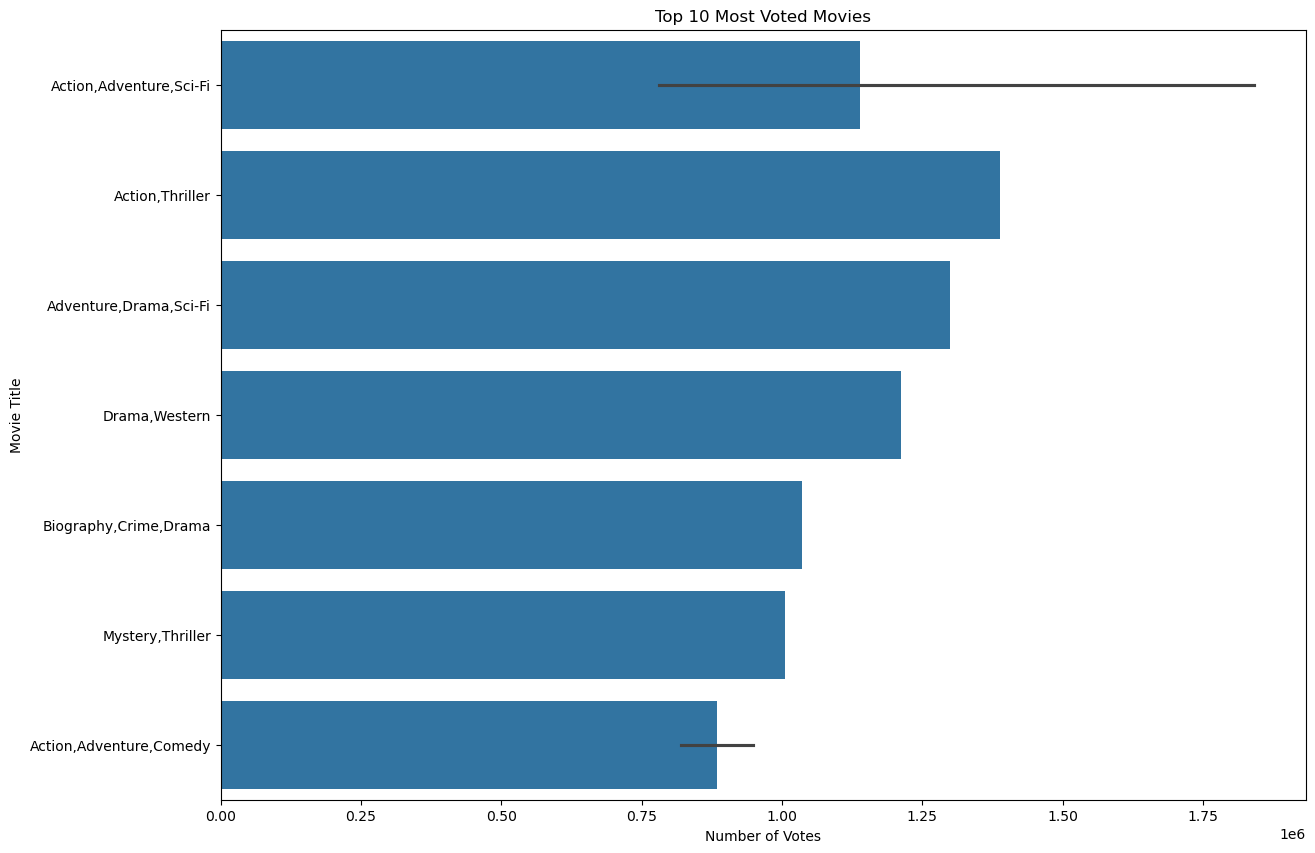

In [62]:
plt.figure(figsize= (14,10))
Top_10= Top_rated.sort_values(by='numvotes', ascending = False). head(10)
sns.barplot (data =Top_10, x='numvotes', y= 'genres')
plt.xlabel('Number of Votes')
plt.ylabel('Movie Title')
plt.title('Top 10 Most Voted Movies')
plt.show()

### 6.2 We will now get the Top 10 Directors by using the worldwide_gross which we will plot with below. We show the primary title and numvotes to see whether directors affect the movies. We sort the values by worldwide_gross in ascending order. The Director with the highest votes is Anthony Russo with the Action, Adventure, Sci-FI Genre followed by Colin Trevorrow with the Action, Adventure, Sci-Fi. worldwide_gross show that certain director are able to make certan genres bring in more gross.

In [63]:
# Select data to be used and clean by dropping null values.
Top_rated = final[['primary_name', 'genres','numvotes', 'worldwide_gross']].dropna()
# Clean the currency in worldwide_gross by removing $ and commas
Top_rated['worldwide_gross'] = Top_rated['worldwide_gross'].replace(r'[\$,]', '', regex=True)
# change the cleaned strings to numeric and use coerce to turn unwanted values to NaN.
Top_rated['worldwide_gross'] = pd.to_numeric(Top_rated['worldwide_gross'],errors= 'coerce')
# Sort values using worldwide_gross and get the first 10 movies and director names.
Top_rated.sort_values(by='worldwide_gross', ascending=False).head(10)

,primary_name,genres,numvotes,worldwide_gross
1062,Anthony Russo,"Action,Adventure,Sci-Fi",670926,2048134200
696,Colin Trevorrow,"Action,Adventure,Sci-Fi",539338,1648854864
697,James Wan,"Action,Crime,Thriller",335074,1518722794
698,Joss Whedon,"Action,Adventure,Sci-Fi",665594,1403013963
1064,Ryan Coogler,"Action,Adventure,Sci-Fi",516148,1348258224
1065,J.A. Bayona,"Action,Adventure,Sci-Fi",219125,1305772799
443,Chris Buck,"Adventure,Animation,Comedy",516998,1272469910
1066,Brad Bird,"Action,Adventure,Animation",203510,1242520711
968,F. Gary Gray,"Action,Crime,Thriller",179774,1234846267
445,Shane Black,"Action,Adventure,Sci-Fi",692794,1215392272


### We will now plot the Top 10 Directors with high gross. We will use a bar graph the x-axis is primary_name and the y-axis is worldwide_gross.

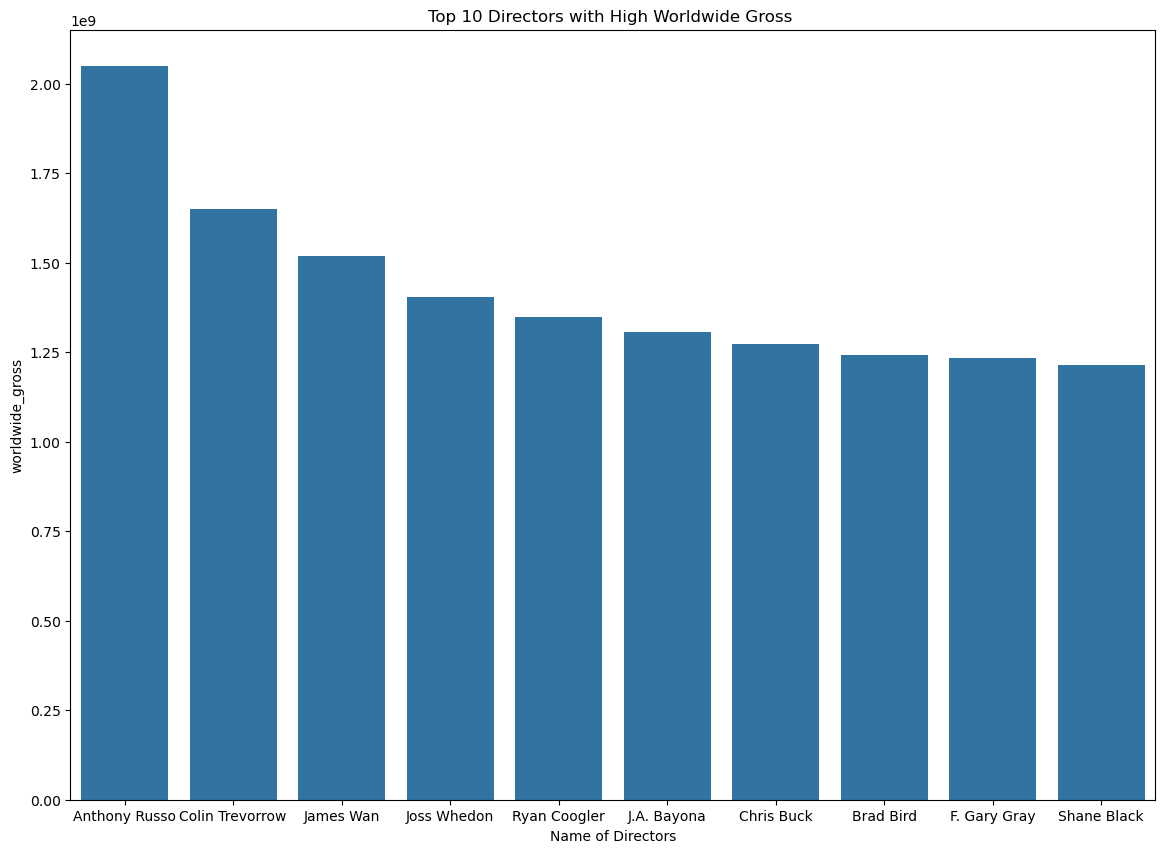

In [64]:
plt.figure(figsize= (14,10))
Top_10= Top_rated.sort_values(by='worldwide_gross', ascending = False). head(10)
sns.barplot (data =Top_10, x='primary_name', y= 'worldwide_gross')
plt.xlabel('Name of Directors')
plt.ylabel('worldwide_gross')
plt.title('Top 10 Directors with High Worldwide Gross ')
plt.savefig('images/directors_high_gross.png')
plt.show()

### 6.3 We will now get the Top 10 movies Genre by using the worldwide_gross which we will plot with below. We show the primary title to see which mvies are in the certain genre, We also sort the values by worldwide_gross in ascending order. The Genres with the highest gross are considered profitable to the New Movie Studio. The Top 10 genre include Action, Adventure, Sci-Fi in both Avengers and Jurassic Park. worldwide_gross shows that certain genres are able to make certan movies bring in more gross.

In [65]:
# Creating a copy of the columns to use
final_subset = final[['primary_title', 'genres','worldwide_gross']].copy()
# clean the currency in the worldwide_gross by removing $ and  ''.
final_subset['worldwide_gross'] = final_subset['worldwide_gross'].replace(r'[\$,]', '', regex=True)
#convert to numeric
final_subset['worldwide_gross'] = pd.to_numeric(final_subset['worldwide_gross'],errors= 'coerce')
# Group and sort values using worldwide_gross
Top_movies =final_subset.groupby(['primary_title', 'genres'])['worldwide_gross'].sum().reset_index()
Top_movies= Top_movies.sort_values(by= 'worldwide_gross', ascending= False)
Top_movies.head(10)

,primary_title,genres,worldwide_gross
85,Avengers: Infinity War,"Action,Adventure,Sci-Fi",2048134200
387,Jurassic World,"Action,Adventure,Sci-Fi",1648854864
271,Furious 7,"Action,Crime,Thriller",1518722794
84,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",1403013963
111,Black Panther,"Action,Adventure,Sci-Fi",1348258224
388,Jurassic World: Fallen Kingdom,"Action,Adventure,Sci-Fi",1305772799
268,Frozen,"Adventure,Animation,Comedy",1272469910
348,Incredibles 2,"Action,Adventure,Animation",1242520711
775,The Fate of the Furious,"Action,Crime,Thriller",1234846267
360,Iron Man 3,"Action,Adventure,Sci-Fi",1215392272


### We will also plot the Top 10 genres with high worldwide_gross. We will use a bar graph, the x-axis is genres and the y-axis is worldwide_gross.

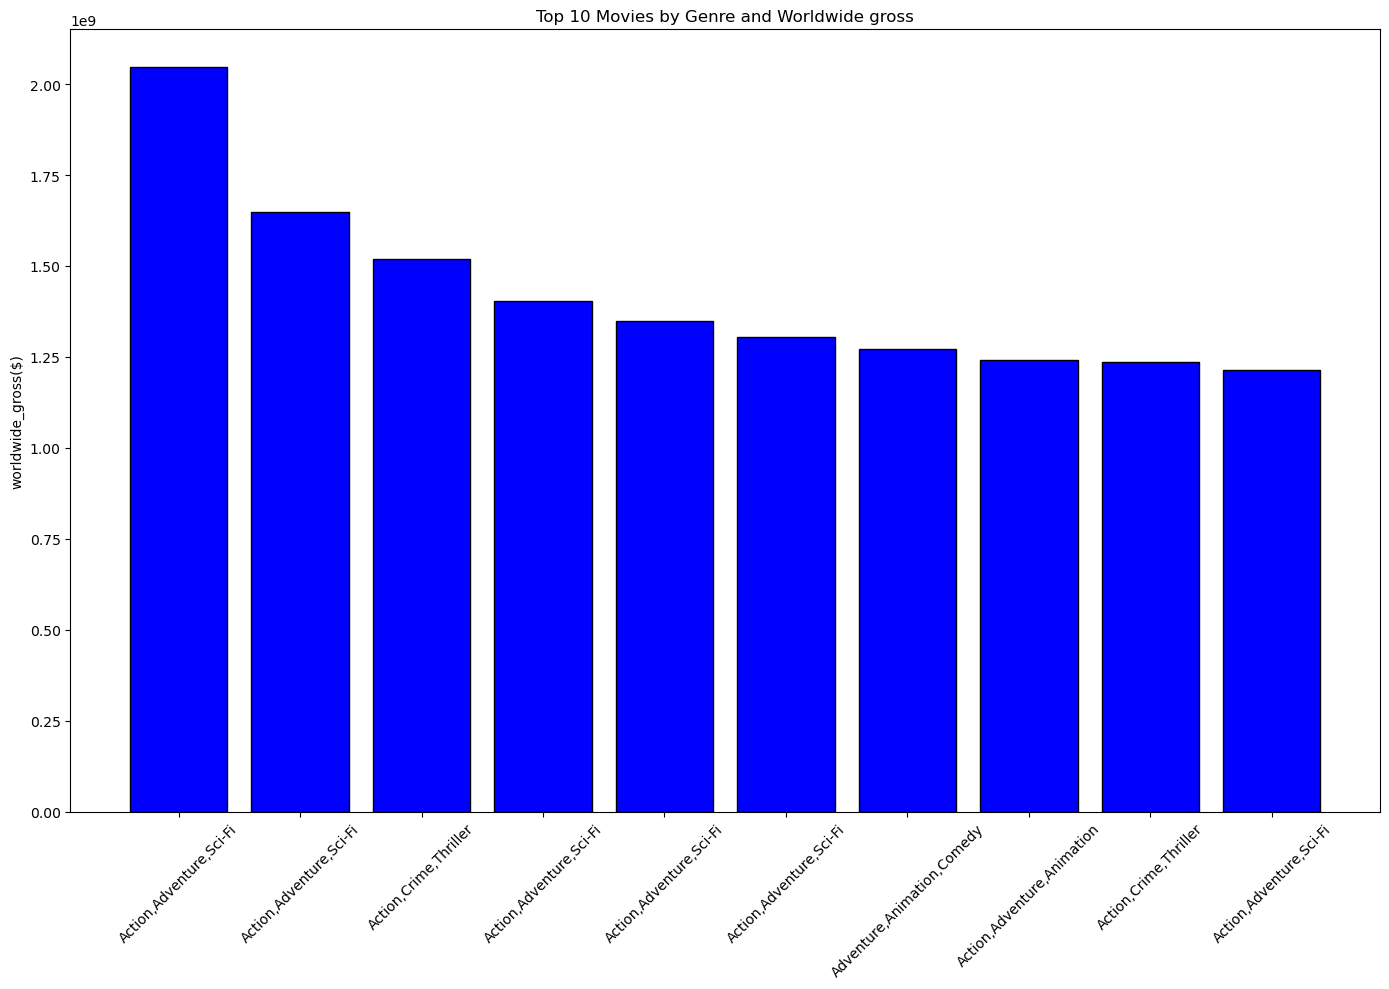

In [66]:
Top_movies= Top_movies.head(10)

bar = np.arange(len(Top_movies))
width= 0.3
gross= Top_movies['worldwide_gross']
genre= Top_movies['genres']
plt.figure(figsize=(14,10))
plt.bar(bar, gross, color='blue', edgecolor='black')

plt.title('Top 10 Movies by Genre and Worldwide gross')
plt.ylabel('worldwide_gross($)')
plt.xticks(bar,labels= genre, rotation=45,)
plt.tight_layout()
plt.savefig('images/genre_worldwide_gross.png')
plt.show()

### 6.4 We will now get the Top 10 primary_title and Genre by using the production_budget which we will plot with below. We also sort the values by production_budget in ascending order. The Genres and primary_title with the highest budget are considered less profitable to the New Movie Studio. The Top 10 genre and primary_title include Action, Adventure, Sci-Fi and Action, Adventure, Fantasy in both Pirates of the Carribean and Avengers:Age of Ultron respectively. This shows genres that have a higher production budget;

In [67]:
# Creating a copy of the columns to use
final_subset = final[['primary_title', 'genres','production_budget']].copy()
# clean the currency in the production_budget by removing $ and ''.
final_subset['production_budget'] = final_subset['production_budget'].replace(r'[\$,]', '', regex=True)
# change to numeric
final_subset['production_budget'] = pd.to_numeric(final_subset['production_budget'],errors= 'coerce')
# Group and sort values by production_budget
Top_budget =final_subset.groupby(['primary_title', 'genres'])['production_budget'].sum().reset_index()
Top_budget= Top_budget.sort_values(by= 'production_budget', ascending= False)

Top_budget.head(10)

,primary_title,genres,production_budget
562,Pirates of the Caribbean: On Stranger Tides,"Action,Adventure,Fantasy",410600000
84,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",330600000
667,Spectre,"Action,Adventure,Thriller",300000000
85,Avengers: Infinity War,"Action,Adventure,Sci-Fi",300000000
391,Justice League,"Action,Adventure,Fantasy",300000000
751,The Dark Knight Rises,"Action,Thriller",275000000
660,Solo: A Star Wars Story,"Action,Adventure,Fantasy",275000000
837,The Lone Ranger,"Action,Adventure,Western",275000000
377,John Carter,"Action,Adventure,Sci-Fi",275000000
696,Tangled,"Adventure,Animation,Comedy",260000000


### We will now plot the Top 10 Genres with highest production_budget. We will use a bar graph, the x-axis is Genre and the y-axis is production_budget.

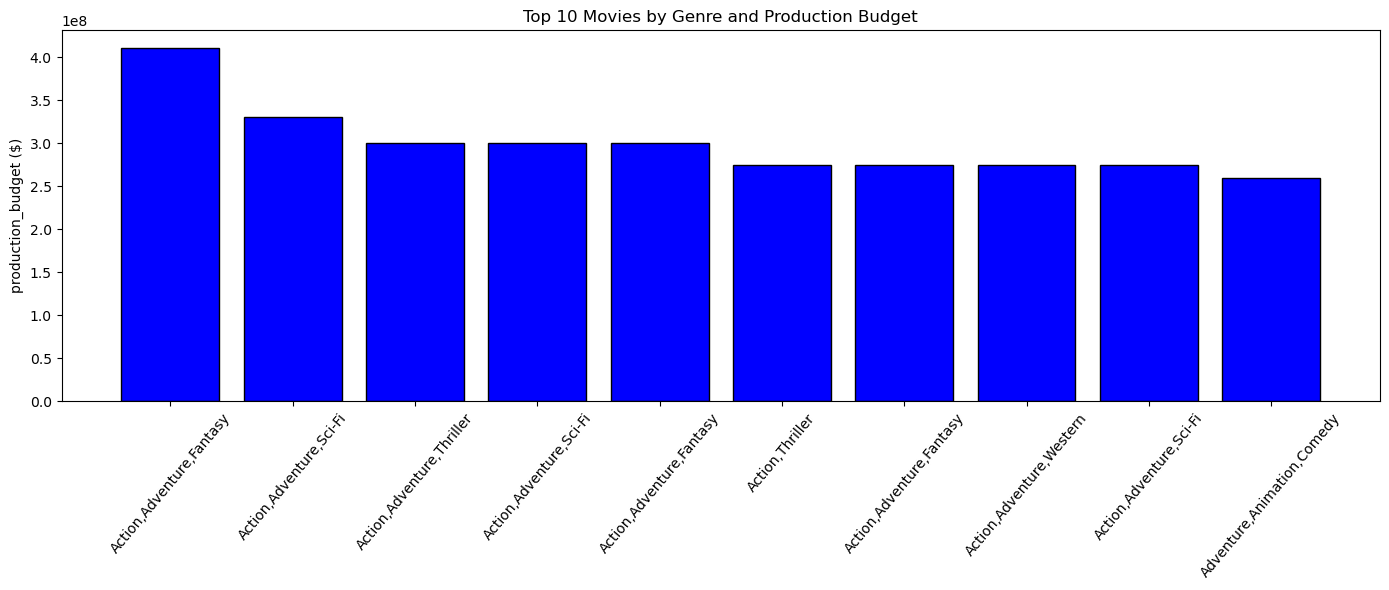

In [68]:
Top_budget= Top_budget.head(10)

bar = np.arange(len(Top_budget))
width= 0.3
production= Top_budget['production_budget']
genre= Top_budget['genres']
plt.figure(figsize=(14,6))
plt.bar(bar, production, color='blue', edgecolor='black')

plt.title('Top 10 Movies by Genre and Production Budget')
plt.ylabel('production_budget ($)')
plt.xticks(bar,labels= genre, rotation=50,)
plt.tight_layout()
plt.show()

### 6.5 We will now get the Top 10 primary_title and Genre by using the foreign_gross and domestic_gross which we will plot with below. We also sort the values by foreign_gross in ascending order, we use foreign_gross as it brings in more revenue than domestic_gross according to our data. The Genres and primary_title with the highest gross are considered profitable to the New Movie Studio. The Top 10 genre and primary_title include Action, Adventure, Sci-Fi and Action, Adventure, Sci-Fi in both and Avengers:Age of Ultron and Jurassic World respectively. Gross shows that certain genres are doing well in foreign countries rather than the productions country, meaning, New Movie Studio can invest in genres that the foreign audience prefer.

In [69]:
# Creating a copy of the columns to use
final_subset = final[['primary_title', 'genres','foreign_gross', 'domestic_gross_y']].copy()
# clean the currency in the foreign_gross by removing $ and ''.
final_subset['domestic_gross_y'] = final_subset['domestic_gross_y'].replace(r'[\$,]', '', regex=True)
final_subset['foreign_gross'] = final_subset['foreign_gross'].replace(r'[\$,]', '', regex=True)
# convert to numeric
final_subset['domestic_gross_y'] = pd.to_numeric(final_subset['domestic_gross_y'],errors= 'coerce')
final_subset['foreign_gross'] = pd.to_numeric(final_subset['foreign_gross'],errors= 'coerce')
# Group and sort values by Production_budget
Top_foreign=final_subset.groupby(['primary_title', 'genres'])[['foreign_gross', 'domestic_gross_y']].sum().reset_index()
Top_foreign=Top_foreign.sort_values(by= 'foreign_gross', ascending= False)
Top_foreign.head(10)

,primary_title,genres,foreign_gross,domestic_gross_y
84,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",946400000.0,459005868
388,Jurassic World: Fallen Kingdom,"Action,Adventure,Sci-Fi",891800000.0,417719760
268,Frozen,"Adventure,Animation,Comedy",875700000.0,400738009
945,Transformers: Age of Extinction,"Action,Adventure,Sci-Fi",858600000.0,245439076
485,Minions,"Adventure,Animation,Comedy",823400000.0,336045770
76,Aquaman,"Action,Adventure,Fantasy",812700000.0,335061807
360,Iron Man 3,"Action,Adventure,Sci-Fi",805800000.0,408992272
562,Pirates of the Caribbean: On Stranger Tides,"Action,Adventure,Fantasy",804600000.0,241063875
649,Skyfall,"Action,Adventure,Thriller",804200000.0,304360277
946,Transformers: Dark of the Moon,"Action,Adventure,Sci-Fi",771400000.0,352390543


### We will now plot the Top 10 primary_title with the highest foreign_gross. We will use a bar graph, the x-axis is primary_title and the y-axis is foreign_gross.

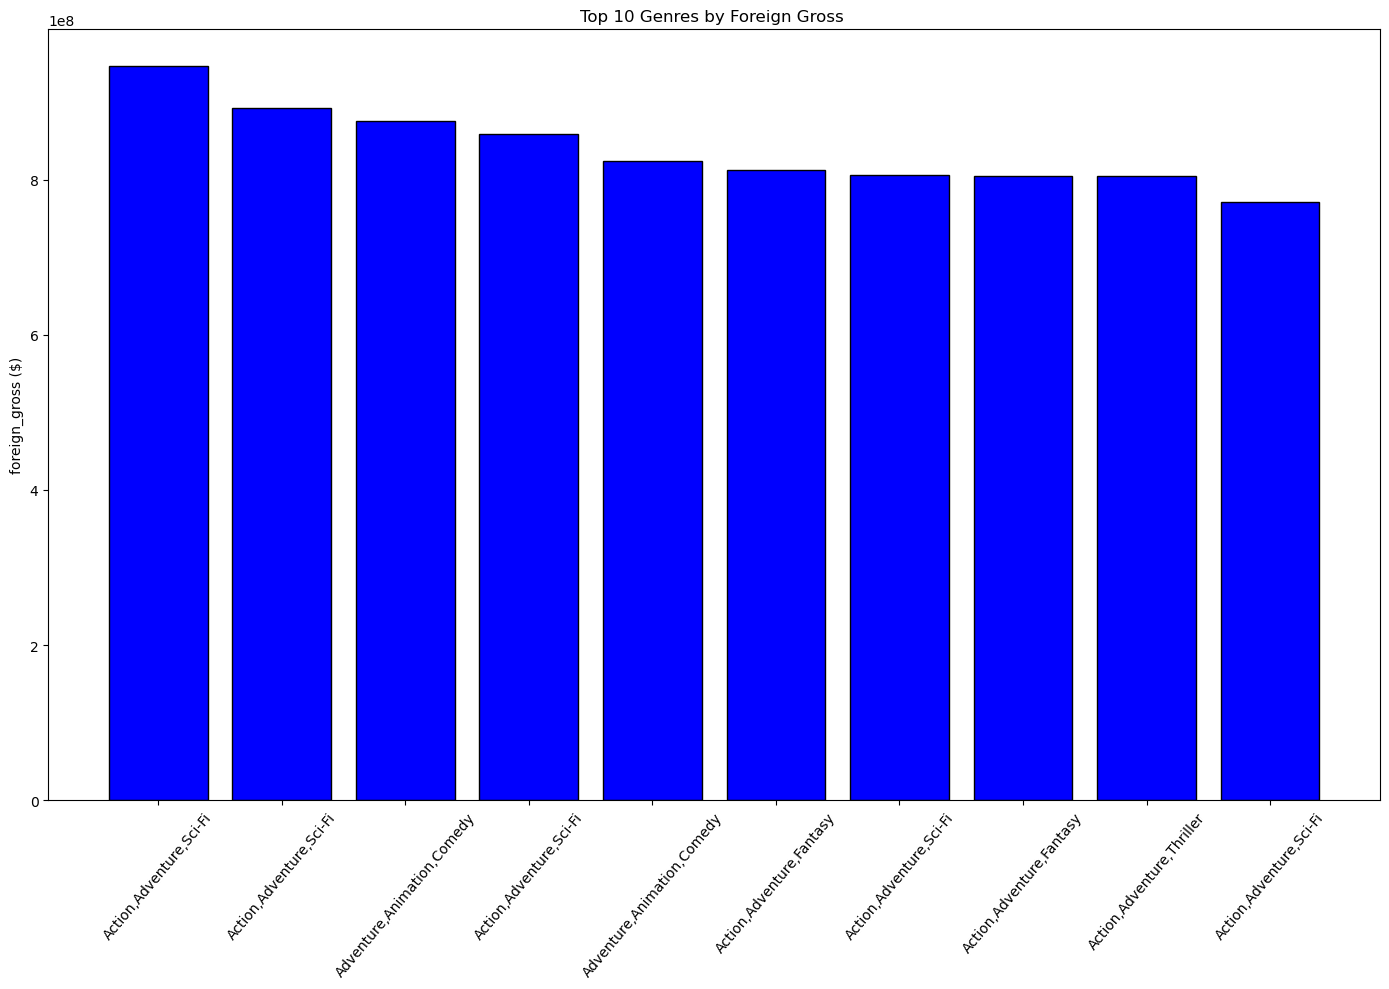

In [70]:
Top_foreign=Top_foreign.head(10)

bar = np.arange(len(Top_foreign))
width= 0.3
foreign= Top_foreign['foreign_gross']
title=Top_foreign['genres']
plt.figure(figsize=(14,10))
plt.bar(bar, foreign, color='blue', edgecolor='black')

plt.title('Top 10 Genres by Foreign Gross ')
plt.ylabel('foreign_gross ($)')
plt.xticks(bar,labels= title, rotation=50,)
plt.tight_layout()
plt.show()

### We will also plot the Top 10 genres with the highest foreign_gross. We will use a bar graph, the x-axis is genres and the y-axis is domestic_gross. According to our graph Action, Adventure, Fanatasy performed poorly domestically.

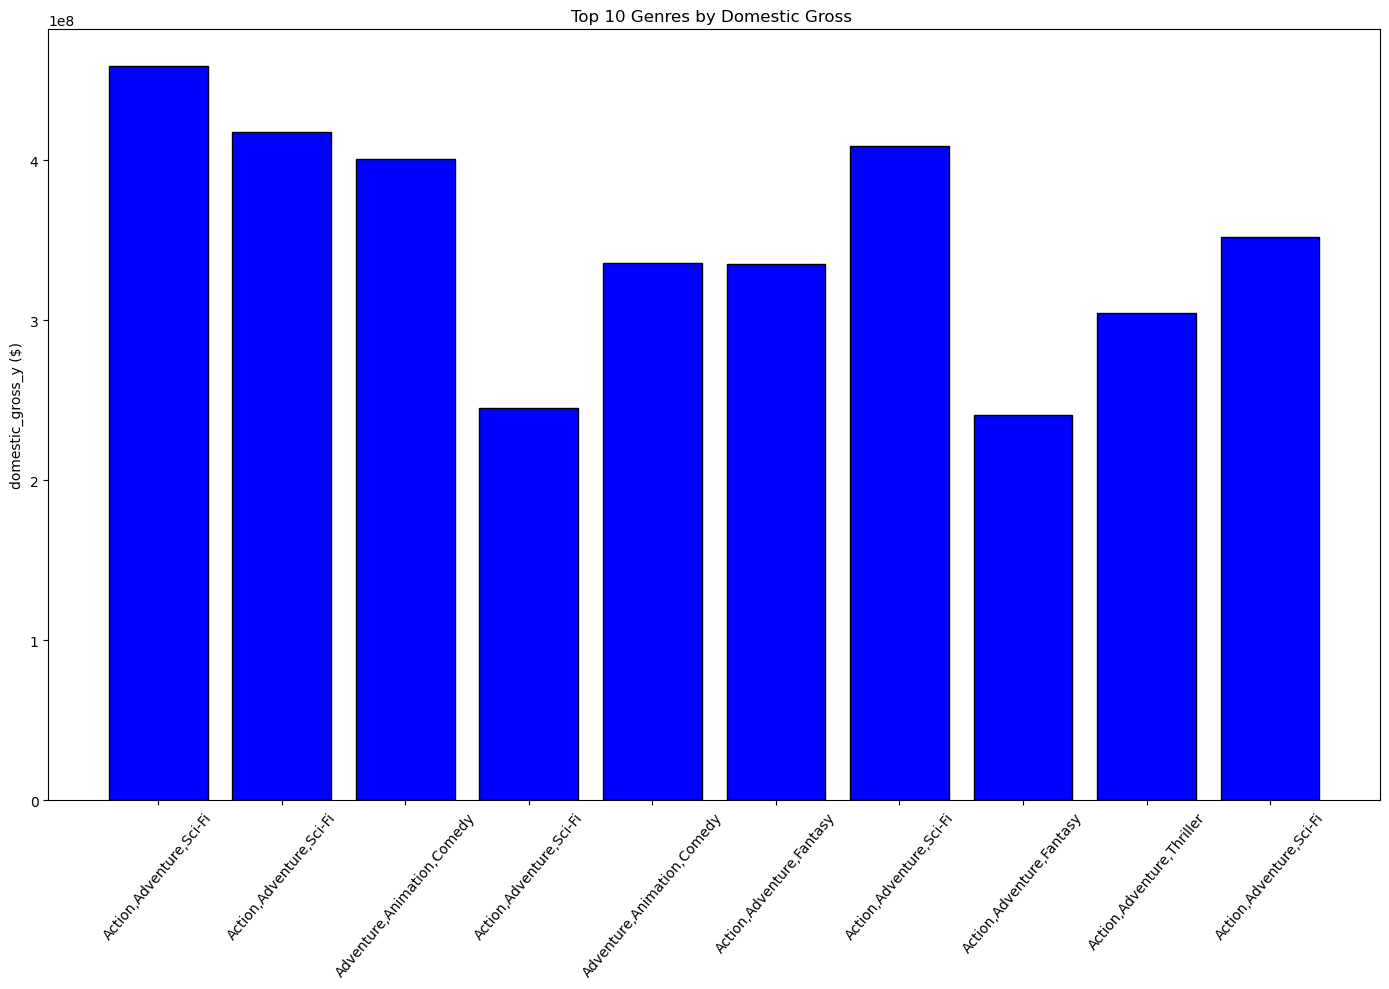

In [71]:
Top_foreign=Top_foreign.head(10)

bar = np.arange(len(Top_foreign))
width= 0.3
foreign= Top_foreign['domestic_gross_y']
genre=Top_foreign['genres']
plt.figure(figsize=(14,10))
plt.bar(bar, foreign, color='blue', edgecolor='black')

plt.title('Top 10 Genres by Domestic Gross ')
plt.ylabel('domestic_gross_y ($)')
plt.xticks(bar,labels= genre, rotation=50,)
plt.tight_layout()
plt.show()

### 6.6 We are finding the correlation between production_budget and worldwide-gross to show whether a higher prduction budget yields a higher worldwide_gross. Correlation analysis was performed to explore the correlation between production budget and worldwide gross variables across different genres. A correlation coefficient of 0.78 indicates a strong positive linear relationship between the two variables. In our analysis it is shown that, as production budget increases, the worldwide gross revenue also tends to increase significantly.

In [72]:
# creating a copy of the columns to use
final_subset = final[['production_budget','worldwide_gross']].copy()
# Clean the currency by removing the dollar signs and ''.
final_subset['production_budget'] = final_subset['production_budget'].replace(r'[\$,]', '', regex=True).astype(float)
final_subset['worldwide_gross'] = final_subset['worldwide_gross'].replace(r'[\$,]', '', regex=True).astype(float)
# change to numeric
final_subset['production_budget'] = pd.to_numeric(final_subset['production_budget'],errors= 'coerce')
final_subset['worldwide_gross'] = pd.to_numeric(final_subset['worldwide_gross'],errors= 'coerce')
# show the correlation
Top_corr= final_subset[['production_budget', 'worldwide_gross']].corr()
Top_corr


,production_budget,worldwide_gross
production_budget,1.000000,0.776318
worldwide_gross,0.776318,1.000000


### We will now plot a scatter plot to show the positive relationship between productoin budget and worldwide_gross in the case of our data higher budgets leade to higher earnings.

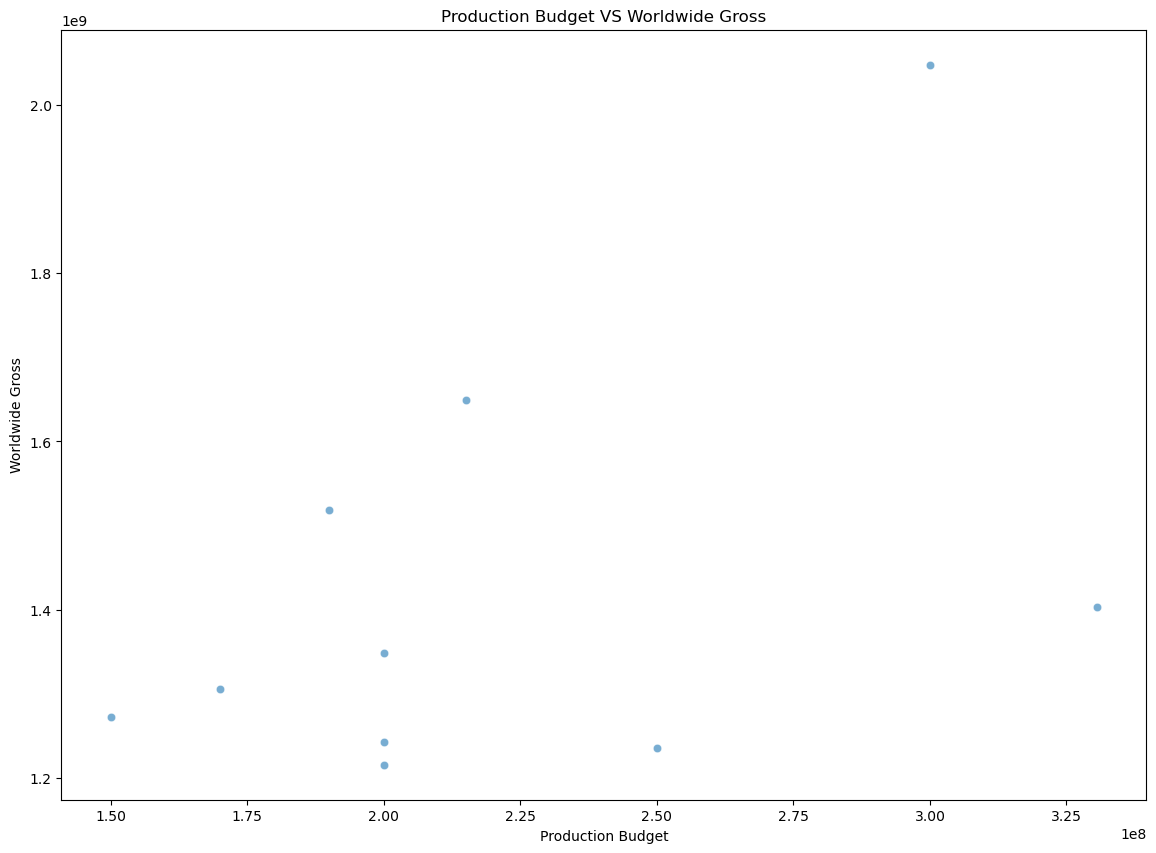

In [73]:
Top_corr=final_subset.sort_values(by='worldwide_gross', ascending = False). head(10)
plt.figure(figsize= (14,10))
sns.scatterplot (data= Top_corr, alpha =0.6, x='production_budget', y= 'worldwide_gross')
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.title('Production Budget VS Worldwide Gross')
plt.savefig('images/production_vs_worldwide.png')
plt.show()

### 6. We will now get the Top 10 Genre by using the production_budget, worldwide_gross to get Return on Investment(ROI), which we will plot with below. We also sort the values by ROI in ascending order. The Genres with the highest ROI are considered profitable to the New Movie Studio. The Top 10 genres include Horror,Mystery, Thriller and followed by Horror. ROI shows that certain genres even with low production budget are doing well and should be invested in by the New Movie Studio.

In [74]:
# creating a copy of the columns to use
final_subset = final[['production_budget', 'genres','worldwide_gross']].copy()
# Clean the currency by removing the dollar signs and ''.
final_subset['worldwide_gross'] = final_subset['worldwide_gross'].replace(r'[\$,]', '', regex=True)
final_subset['production_budget'] = final_subset['production_budget'].replace(r'[\$,]', '', regex=True)
# change to numeric
final_subset['production_budget'] = pd.to_numeric(final_subset['production_budget'], errors='coerce')
final_subset['worldwide_gross'] = pd.to_numeric(final_subset['worldwide_gross'], errors='coerce')
# calculating the Return of Investment
final_subset['ROI'] = (final_subset['worldwide_gross'] - final_subset['production_budget']) / final_subset['production_budget']
#Sort by ROI 
Top_ROI = final_subset[['genres','ROI']].sort_values(by='ROI', ascending=False)
Top_ROI.head(10)

,genres,ROI
776,"Horror,Mystery,Thriller",415.564740
372,Horror,100.759490
34,Horror,58.170677
997,"Horror,Mystery,Thriller",50.073590
401,"Horror,Mystery,Thriller",41.411721
186,"Horror,Mystery,Thriller",40.407969
609,"Horror,Mystery,Thriller",38.517372
69,"Drama,Horror,Thriller",37.981056
858,"Action,Biography,Drama",30.016276
506,"Horror,Thriller",29.422194


### We will now plot the Top 10 Genres with the highest ROI. We will use a bar graph, the x-axis is Genres and the y-axis is ROI.

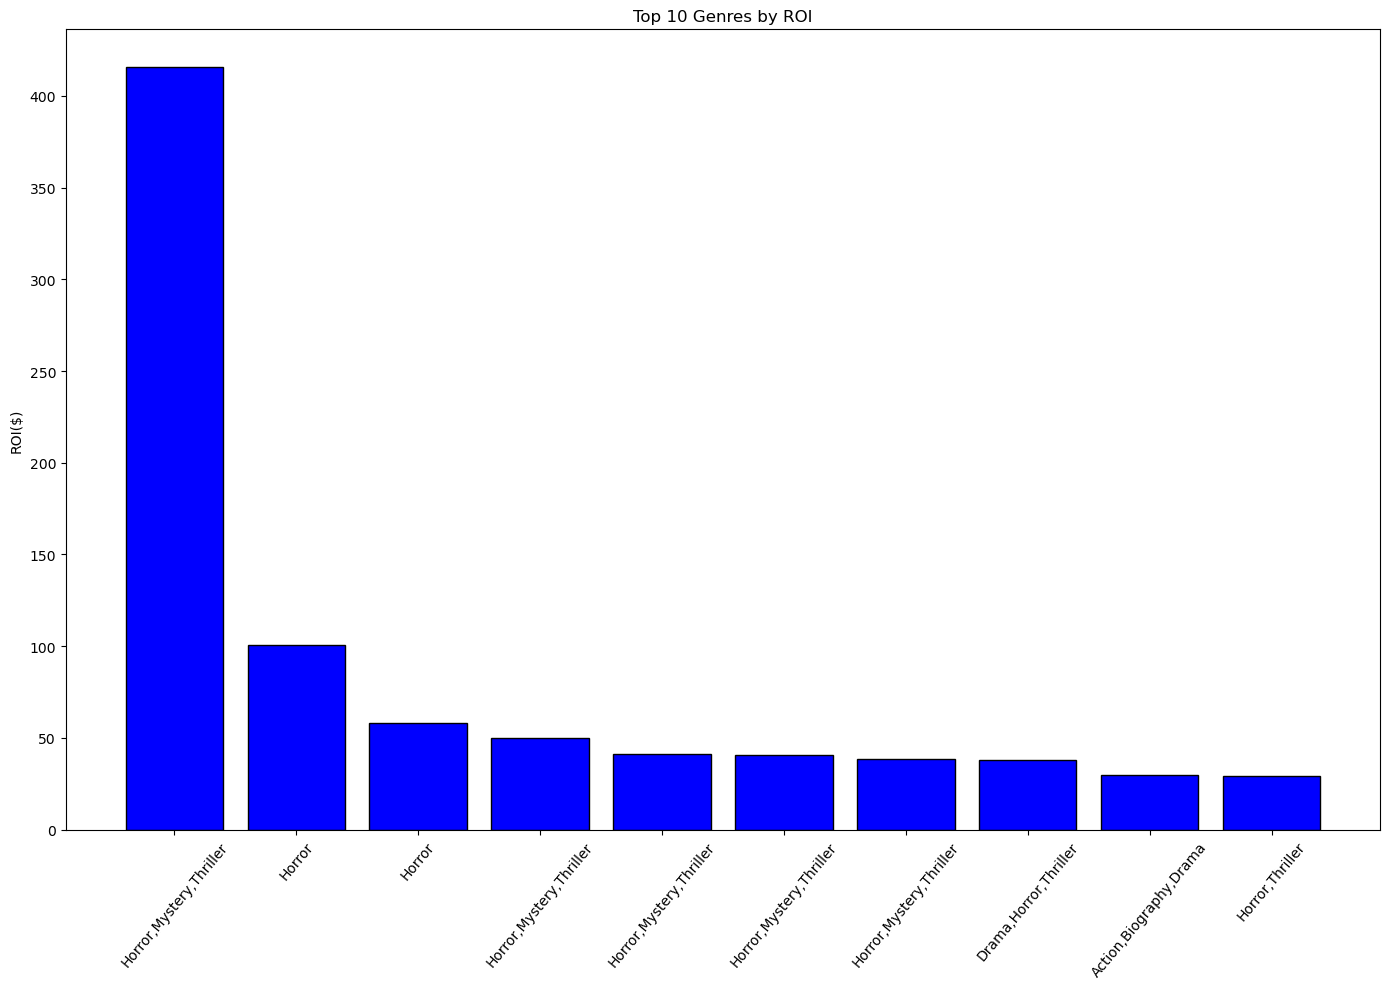

In [75]:
Top_ROI=Top_ROI.head(10)

bar = np.arange(len(Top_ROI))
width= 0.3
ROI= Top_ROI['ROI']
genre=Top_ROI['genres']
plt.figure(figsize=(14,10))
plt.bar(bar,ROI, color='blue', edgecolor='black')

plt.title('Top 10 Genres by ROI')
plt.ylabel('ROI($)')
plt.xticks(bar,labels= genre, rotation=50,)
plt.tight_layout()
plt.savefig('images/Genres_By_ROI.png')
plt.show()

## We will now add ROI to our final data-set

In [76]:
final['ROI'] = final_subset['ROI']

## 7. Conclusion
* It can be concluded that some genres and movies make more money than the rest when compared with production_budget and all the gross.
* Some top movies when compared with votes have a lower engagement, showing that movie success does not always reflect long-term audience engagement.
* Certain directors have the capability of making movies and certain genres to be a success.
* Low to mid budget films can be highly Profitable in that high grossing movies with low ROI are not worth doing.

## 8. Recommendation
* New Movie Studio should invest in certain Directors that will help them reach optimum success.
* They should balance the production budget with the audience trend or engagement this allows more views on the movies.
* Invest startegically in high production budgets as they are associated with high worldwide_gross according to our data.
* New Movie Studio should analyze ROI in order to trim unnecessary production expenses and maximize marketing effectiveness.

In [77]:
final.to_csv('cleaned_final.csv')